In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# Generate Cities List

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

## API call
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [45]:
from pprint import pprint
#testing if the api works correctly with 1 single city
base_url = 'http://api.openweathermap.org/data/2.5/weather'
target_city = "vaitupu"
params = {"q" : target_city, "appid" : weather_api_key, "units": "imperial"}

test_city = requests.get(base_url, params=params).json()
pprint(test_city)

{'cod': '404', 'message': 'city not found'}


In [39]:
#
test_city['coord'][]

{'lon': 23.0315, 'lat': 40.5878}

### putting the data into a data frame
* instead of doing weather check for ach of the city, gather the dat into a list/dict...
* I want to try to retrive the data and put them into a data frame at the same process.
* using for loop with .iterrows()

In [62]:
weather_df = pd.DataFrame()
weather_df['Cities'] = cities
weather_df['Lat'] = ""
weather_df['Lng'] = ""
weather_df['Max Temp'] = ""
weather_df['Humidity'] = ""
weather_df['Cloudiness'] = ""
weather_df['Wind Speed'] = ""
weather_df['Date'] = ""

In [63]:
counter = 0
weather_json = []

base_url = 'http://api.openweathermap.org/data/2.5/weather'


for index,row in weather_df.iterrows():
    city = row['Cities']
    params = {"q" : city, "appid" : weather_api_key, "units" : "imperial"}
    weather_response = requests.get(base_url, params=params).json()
    counter += 1
    print(f"Processing Record {counter} | {city}")
    
    time.sleep(1)
    try:
        weather_df.loc[index, "Lat"] = weather_response['coord']['lat']
        weather_df.loc[index, "Lng"] = weather_response['coord']['lon']
        weather_df.loc[index, "Max Temp"] = weather_response['main']['temp_max']
        weather_df.loc[index, "Humidity"] = weather_response['main']['humidity']
        weather_df.loc[index, "Cloudiness"] = weather_response['clouds']['all']
        weather_df.loc[index, "Wind Speed"] = weather_response['wind']['speed']
        weather_df.loc[index, "Date"] = weather_response['dt']
    except:
        print(f"ERROR! THERE IS NO INFO ABOUT {city}")

Processing Record 1 | warqla
ERROR! THERE IS NO INFO ABOUT warqla
Processing Record 2 | albany
Processing Record 3 | kapaa
Processing Record 4 | chapais
Processing Record 5 | san javier
Processing Record 6 | ushuaia
Processing Record 7 | busselton
Processing Record 8 | locri
Processing Record 9 | jamestown
Processing Record 10 | illoqqortoormiut
ERROR! THERE IS NO INFO ABOUT illoqqortoormiut
Processing Record 11 | bluff
Processing Record 12 | nizhneyansk
ERROR! THERE IS NO INFO ABOUT nizhneyansk
Processing Record 13 | rikitea
Processing Record 14 | butaritari
Processing Record 15 | arraial do cabo
Processing Record 16 | vaini
Processing Record 17 | kaitangata
Processing Record 18 | poum
Processing Record 19 | touros
Processing Record 20 | barentsburg
ERROR! THERE IS NO INFO ABOUT barentsburg
Processing Record 21 | coalcoman
ERROR! THERE IS NO INFO ABOUT coalcoman
Processing Record 22 | lagoa
Processing Record 23 | bredasdorp
Processing Record 24 | termiz
Processing Record 25 | providen

Processing Record 224 | codrington
Processing Record 225 | nguiu
ERROR! THERE IS NO INFO ABOUT nguiu
Processing Record 226 | padang
Processing Record 227 | port elizabeth
Processing Record 228 | saravan
Processing Record 229 | sentyabrskiy
ERROR! THERE IS NO INFO ABOUT sentyabrskiy
Processing Record 230 | geraldton
Processing Record 231 | bodo
Processing Record 232 | cortez
Processing Record 233 | tura
Processing Record 234 | vadum
Processing Record 235 | richards bay
Processing Record 236 | surazh
Processing Record 237 | yanam
Processing Record 238 | amapa
Processing Record 239 | cidreira
Processing Record 240 | orlik
Processing Record 241 | netrakona
Processing Record 242 | mogadishu
Processing Record 243 | tyup
Processing Record 244 | klaksvik
Processing Record 245 | akim swedru
Processing Record 246 | mercedes
Processing Record 247 | maceio
Processing Record 248 | yar-sale
Processing Record 249 | sun city west
Processing Record 250 | brattleboro
Processing Record 251 | umzimvubu
ER

Processing Record 449 | sao joao da barra
Processing Record 450 | prince rupert
Processing Record 451 | hervey bay
Processing Record 452 | luanda
Processing Record 453 | lagunas
Processing Record 454 | san luis
Processing Record 455 | taunggyi
Processing Record 456 | bud
Processing Record 457 | puerto cortes
ERROR! THERE IS NO INFO ABOUT puerto cortes
Processing Record 458 | tual
Processing Record 459 | portland
Processing Record 460 | kirensk
Processing Record 461 | mbandaka
Processing Record 462 | port macquarie
Processing Record 463 | roald
Processing Record 464 | lumphat
Processing Record 465 | mount isa
Processing Record 466 | whitehorse
Processing Record 467 | stara vyzhivka
Processing Record 468 | morondava
Processing Record 469 | katobu
Processing Record 470 | grand-lahou
Processing Record 471 | yining
Processing Record 472 | nicoya
Processing Record 473 | ugoofaaru
Processing Record 474 | rochegda
Processing Record 475 | cayenne
Processing Record 476 | pimenta bueno
Processing

### clear out all the row that couldn't get data due to errors

In [84]:
#replace all the '' value (it's string type) by NaN
weather_df = weather_df.replace('', np.NaN)
#start dropping NaN value
weather_df = weather_df.dropna(axis=0, how="any")
weather_df.head(10)

,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
1,albany,42.6001,-73.9662,56.44,80.0,40.0,3.15,1.634802e+09
2,kapaa,22.0752,-159.3190,73.72,82.0,1.0,3.44,1.634802e+09
3,chapais,49.7834,-74.8492,33.58,91.0,96.0,5.46,1.634802e+09
4,san javier,37.8063,-0.8374,77.23,68.0,0.0,1.99,1.634802e+09
5,ushuaia,-54.8000,-68.3000,47.86,40.0,40.0,24.16,1.634802e+09
6,busselton,-33.6500,115.3333,66.04,62.0,43.0,16.11,1.634802e+09
7,locri,38.2414,16.2623,70.83,58.0,0.0,4.76,1.634802e+09
8,jamestown,42.0970,-79.2353,60.39,76.0,20.0,10.36,1.634802e+09
10,bluff,-46.6000,168.3333,46.58,68.0,2.0,12.64,1.634802e+09
12,rikitea,-23.1203,-134.9692,74.66,73.0,95.0,18.63,1.634802e+09


In [85]:
#It's pointless to get these stat calculation for Date, Lattitude and Longitude.
weather_df[['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']].describe()

,Max Temp,Humidity,Cloudiness,Wind Speed
count,553.000000,553.000000,553.000000,553.000000
mean,62.074231,70.808318,60.396022,8.069222
std,20.548677,20.911290,39.220398,5.910313
min,-15.720000,8.000000,0.000000,0.000000
25%,49.260000,60.000000,20.000000,3.710000
50%,65.950000,76.000000,75.000000,6.910000
75%,78.800000,86.000000,99.000000,10.940000
max,107.580000,100.000000,100.000000,31.520000


In [88]:
#Check if there are places that have the humidity >100%
weather_df.loc[weather_df['Humidity'] > 100]
#There is no places in the DF had the humidity >100%

,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date


### There is no places in the data frame that have the humidity > 100%

# Plotting data

### Latitude vs Max Temp

<AxesSubplot:title={'center':'City Latitide vs Max Temperature'}, xlabel='Lat', ylabel='Max Temp'>

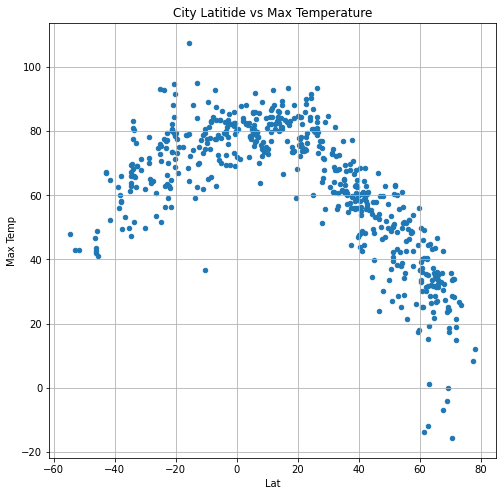

In [94]:
weather_df.plot(kind="scatter", x='Lat', y='Max Temp', grid=True, 
                title="City Latitide vs Max Temperature", figsize=(8,8))

### Latitude vs Humidity

<AxesSubplot:title={'center':'City Latitide vs Humidity'}, xlabel='Lat', ylabel='Humidity'>

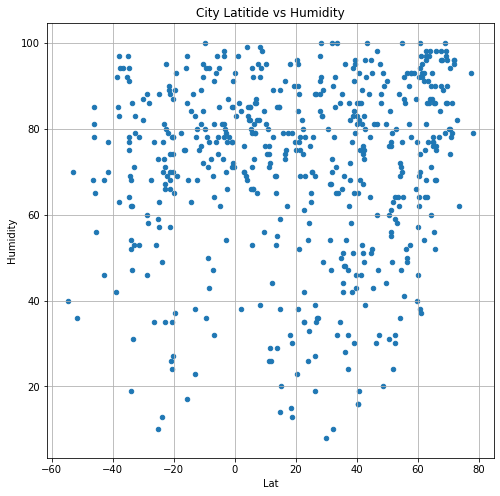

In [95]:
weather_df.plot(kind="scatter", x='Lat', y='Humidity', grid=True, 
                title="City Latitide vs Humidity", figsize=(8,8))

### Latitude vs Cloudiness

<AxesSubplot:title={'center':'City Latitide vs Cloudiness'}, xlabel='Lat', ylabel='Cloudiness'>

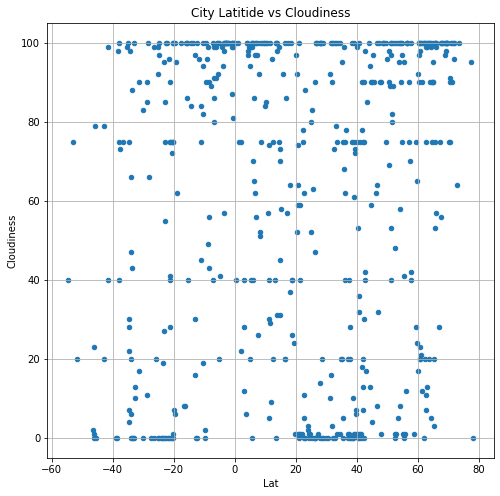

In [96]:
weather_df.plot(kind="scatter", x='Lat', y='Cloudiness', grid=True, 
                title="City Latitide vs Cloudiness", figsize=(8,8))

### Latitude vs Wind Speed

<AxesSubplot:title={'center':'City Latitide vs Wind Speed'}, xlabel='Lat', ylabel='Wind Speed'>

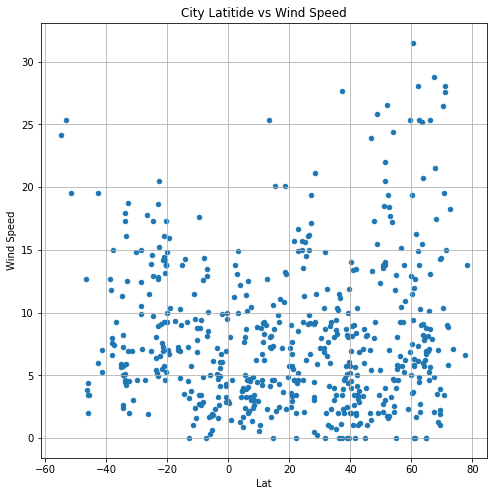

In [97]:
weather_df.plot(kind="scatter", x='Lat', y='Wind Speed', grid=True, 
                title="City Latitide vs Wind Speed", figsize=(8,8))

#  Linear Regression

In [100]:
northern_hem_df = weather_df.loc[weather_df["Lat"] > 0]
linregress(northern_hem_df.Lat, northern_hem_df['Max Temp'])

LinregressResult(slope=-0.9416200482428381, intercept=93.88063593097681, rvalue=-0.8830225878820641, pvalue=6.720514815343892e-127, stderr=0.02567384143946473, intercept_stderr=1.11524514576661)